<a href="https://colab.research.google.com/github/DouaaKdidar/StanfordCS229-notes-and-projects/blob/main/Stanford_CS229_COURSE_NOTES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Course n2 (Stanford CS229 by Andrew Ng):**
 These are the notes for my second machine learning course  and implementations of the algorithms (not part of the course). Here I got to  discover more theory and code projects by myself from start to finish .  



---



# **Lecture 2  :    Linear Regression and Gradient Descent**    
    

---


*   The optimization problem
*   Batch/Stochastic Gradient Descent
*   Normal equation

Notations :      
n is the number of features

m is the number of training examples

h is the hypothesis (the linear function)

$(x^{(i)} , y^{(i)})$ is a training data point

h = $θ^T.X$   , $x_0 = 1 $




1.   The loss Function :

$L(θ) = \sum_{i=1}^n (h_θ(x^{(i)})-y^{(i)})^2$ = 1/2*$J(θ)$

The optimization problem becomes $min_θ = J(θ)$

2. Gradient Descent :
The gradient descent is how we find solve θ , it works like this:      

We start with some θ (usually set to $\vec{0}$), we then assign θ in the folowing way to reduce J(θ):  

$θ_j := θ_j - α*\frac{\partial J(θ)}{\partial θ_j}$

θ_j being the jth entry of θ

Since $\frac{\partial J(θ)}{\partial θ_j }= \sum_{i=1}^n (h_θ(x^{(i)})-y^{(i)})*X^{(i)}_j$

Then $θ_j := θ_j - α*\sum_{i=1}^n (h_θ(x^{(i)})-y^{(i)})*X^{(i)}_j$

Which we repeat until convergence . Convergence is actually garanted since there is only one local  minimun .
This version is also called Batch Gradient Descent , it's disadvantage is that each iteration is Ω(m) , which can be very costly when dealing with large datasets.

That is why we ususally work with Stochastic Gradient Descent, when in each iteration we optimize for one datapoint , given by :       
Repeate{

   for i in $\{1, \dots, n\}${

  $θ_j := θ_j - α*\frac{\partial J(θ_i)}{\partial θ_j}$

        

   }}

meaning at each iteration ,  $θ_j := θ_j - α*h_θ(x^{(i)})-y^{(i)}*X^{(i)}_j$


3.  The Normal Equation :      
For the specific case of Linear Regression, we have a way to calculate θ precisely by finding for which θ $\nabla_θ J(θ) = \vec{0}$    (1).

But first we will change notations to make things simpler, $X$ is the design matrix having training feature vectors on rows , $θ$ is the parameters column vector , which means that now h = $X.Θ$ , $y$ is the labels column vector.

In this case , $J(θ) = 1/2*(X.θ-Y)^T.(X.θ-Y)$

Linear Algebra :

$\nabla_θ tr(A.B) = B^T$

tr(AB) = tr(BA)

tr(ABC) = tr(CAB)

$\nabla_θ tr(A.A^T.C) = C.A + C^T.A $.

These result enable us to solve (1) :    
  
$θ = (X^T.X)^{-1}.X^T.Y$














In [ ]:
#lets implement Linear Regression from Scratch
def batch_gradient_descent(xtrain , ytrain , alpha , tol = 0.01):
  m , n = xtrain.shape #number of instances , number of features
  theta = np.zeros(n)
  norm1 = 0
  norm2 = tol + 1
  while abs(norm2-norm1) > tol  :
    norm1 = np.linalg.norm(theta)
    for j in range(n) :
      sum = 0
      for i in range(m) :
        sum += xtrain[i, j]*(theta.dot(xtrain[i].T)-ytrain[i])
      theta[j] = theta[j] - alpha*sum
    norm2 = np.linalg.norm(theta)
  return theta

def stochastic_gradient_descent(xtrain , ytrain , alpha , ephochs):
  m , n = xtrain.shape #number of instances , number of features
  theta = np.zeros(n)
  for k in range(ephochs) : # here we have is no garantee of convergence
    for i in  range(m) :
      for j in range(n) :
        theta[j] = theta[j] - alpha*xtrain[i , j](theta.dot(xtrain[i].T)-ytrain[i])
  return theta

#using the normal equation to find theta directly , the case whre xtrain.T.dot(xtrain) is invertible
def normal_equation(xtrain , ytrain , alpha) :
  x = xtrain.T
  y = ytrain.T
  A = x.T.dot(x)
  if np.linalg.det(A) == 0 :
    theta = batch_gradient_descent(xtrain , ytrain , alpha )
    print('Gradient discent is used , try getting rid of proportional instances')
  else:
    theta = np.linalg.inv(A).dot(x.T).dot(y)
  return theta

def mse(ytest , ypred) :
  return np.mean((ypred-ytest)**2)


In [ ]:
#lets apply this to predict air foil self-Noise
#URL of the data set from UCI machine leaning repo : https://archive.ics.uci.edu/dataset/291/airfoil+self+noise


In [ ]:

import numpy as np
import pandas as pd

features = ['frequency' , 'attack-angle' , 'chord-length' , 'free-stream-velocity' , 'suction-side-displacement-thickness' , 'scaled-sound-pressure' ]
df = pd.read_csv('airfoil+self+noise.zip' , names = features ,  sep='\t' )
df.insert(0 , 'ones' , 1)

#spliting the data
from sklearn.model_selection import train_test_split
x = df.drop('scaled-sound-pressure' , axis = 1 )
y = df['scaled-sound-pressure']
xtrain , xtest , ytrain , ytest = train_test_split(x, y, test_size=0.2, random_state=42)
xtrain = np.array(xtrain)
xtest = np.array(xtest)
ytrain = np.array(ytrain)
ytest = np.array(ytest)
df.head()



,ones,frequency,attack-angle,chord-length,free-stream-velocity,suction-side-displacement-thickness,scaled-sound-pressure
0,1,800,0.0,0.3048,71.3,0.002663,126.201
1,1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1,1250,0.0,0.3048,71.3,0.002663,125.951
3,1,1600,0.0,0.3048,71.3,0.002663,127.591
4,1,2000,0.0,0.3048,71.3,0.002663,127.461


In [ ]:
theta = normal_equation(xtrain , ytrain , 0.001)
ypred = theta.dot(xtrain.T)
print(mse(ytrain , ypred))

Gradient discent is used , try getting rid of proportional instances
inf


/tmp/ipython-input-12-2597945296.py:7: RuntimeWarning: invalid value encountered in scalar subtract
  while abs(norm2-norm1) > tol  :
/tmp/ipython-input-12-2597945296.py:39: RuntimeWarning: overflow encountered in square
  return np.mean((ypred-ytest)**2)


In [ ]:
theta

array([ 1.87656473e+160, -8.37959756e+162,  1.43320104e+167,
       -1.08714336e+167, -5.81248984e+169,  3.97404334e+169])

# logistic Regression

# ---
# **Lecture 3 : Locally Weighted and logistic regression**

---

Overview :

1.   Locally weighted regression
2.   Probabilistic interpertation
3.   Logistic Regression
4.   Newton's method


1) **Locally weighted regression** :        
There are two types of learning algorithms :   'Parametric' which fits a fixed number of parameters $\theta_i$ to the data , we can then get rid of the data and store θ  just like we did before, it makes a fixed strong assumption. But there is another type called  'non parametric' , this type does not make any strong assumption about the model and the amount of data/parameteres used to learn grows (linearly in our case) with the size of data .What non parametric models do , according to the data point x for which we want to predict y , is try to find the best model that is going to predict for the specific case of x , thus we have a non fixed function but rather one that tries to do best for every data point prediction .

Locally weighted regression  is the non parametric version of linear regression , it finds a set of points that are close to the one to be predicted and finds the best model fit to that region , it does take into account the farther datapoints but with less emphasis.

Formaly , its optimization problem is :     
          $min_θ  = \sum_{i=1}^m ω_i(y^{(i)}-θ^T.x^{(i)})^2$

where $ω_i$ is a weighting function in [0 , 1 ] defined by :      

$ω_i = exp(-(x^{(i)}-x)/2τ^2)$  this gives more weight to closer points

x is the point we want to predict

it turns out that this function has a 'kind of' bell shaped curve around x , τ is the 'bandwidth' of that bell , and it is a hyperparameter


2) **Probabilistic interpertation** :      
here we are going to explain how we got the optimization problem for linear regression .

we have :    $ y^{(i)} = θ^T.x^{(i)} + ϵ_i$


Actually , in  linear regression , we make a set of assumptions on the error terms $ϵ_i$


*   $ϵ_i$ folow a normal (gaussian) distribution of mean 0 and variance $σ^2$
  , meaning
   $p(\varepsilon_i) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{\varepsilon_i^2}{2\sigma^2}\right)$


*   IID 'indepentenlty and identically distributed' , meaning $ϵ_i$ does not influence $ϵ_j$

these two imply that:    

$P\left(y^{(i)} \mid x^{(i)}; \theta\right) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left( -\frac{\left(y^{(i)} - h_\theta(x^{(i)})\right)^2}{2\sigma^2} \right)$


Now let's define a new function $\mathcal{L}(\theta)$ giving the likelihood of θ (or the probability of the dataset)  , and $l(Θ)$ giving the logarithmic likelihood

In general , the goal of a learning algorithm is to find θ that maximizes $l(Θ)$ , khow as maximum likelihood estimation

Since the datapoints are independent (assumption 2)  :     
$\mathcal{L}(\theta)$ = P(y |x ; θ) = $\prod_{i=1}^{m} P\left(y^{(i)} \mid x^{(i)}; \theta\right) = \prod_{i=1}^{m} \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left( -\frac{\left(y^{(i)} - h_\theta(x^{(i)})\right)^2}{2\sigma^2} \right)$

thus   $l(Θ)$ = $\log \mathcal{L}(\theta) = \sum_{i=1}^{m} \left[ -\frac{1}{2} \log(2\pi\sigma^2) - \frac{\left(y^{(i)} - h_\theta(x^{(i)})\right)^2}{2\sigma^2} \right]$

The problem now boils down to  $min_\theta  J(θ) = \sum_{i=1}^n (h_θ(x^{(i)})-y^{(i)})^2$


3) Logistic Regression :     

In it's essence logistic regresssion is a classification algorithm , we will here adress the problem of binary classification , meaning dividing input to two classes in {0 , 1}  :

logistic regression $h_θ$ applies a linear function folowed by the sigmoid function that has values in [0 , 1]

$h_θ  = \frac{1}{1 + e^{-ϴ^T.X}}$

.


$P(y^{(i)} = 1  | x^{(i)} ; θ) = h_θ(x^{(i)})$

$P(y^{(i)} = 0  | x^{(i)} ; θ) = 1-h_θ(x^{(i)})$

.

$P(y^{(i)} | x^{(i)} ; θ) = h_θ(x^{(i)})^{y^{(i)}}.(1-h_θ(x^{(i)}))^{y^{(i)}}$


$\mathcal{L}(\theta)$ =$P(y | x ; θ)$ = $\prod_{i=1}^{m}P(y^{(i)} | x^{(i)} ; θ) = \prod_{i=1}^{m}h_θ(x^{(i)})^{y^{(i)}}.(1-h_θ(x^{(i)}))^{y^{(i)}}$

.

$\ell(\theta) = \sum_{i=1}^{m} \left[ y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)})) \right]$


Just like linear regression , our goal is to find θ that will maximize the probability of our dataset , which is equivalent to maximizing the log likelihood.

To find θ , we use 'Batch Gradient Ascent'
given by :     

$θ_j := θ_j +  α*\frac{\partial J(θ)}{\partial θ_j}$

θ_j being the jth entry of θ

Since $\frac{\partial J(θ)}{\partial θ_j }= \sum_{i=1}^n (h_θ(x^{(i)})-y^{(i)})*X^{(i)}_j$

Then $θ_j := θ_j +  α*\sum_{i=1}^n (h_θ(x^{(i)})-y^{(i)})*X^{(i)}$

4) Newton's method :     
this part is like the normal equation that we discussed in linear regression . Newton's method is a  algorithm for finding the roots of a function $\mathcal{f}$ , it's  order of convergence is quadratic ,  is given by :      


$θ_(j+1) := θ_j -  f(θ_j)/f^{'}(θ_j)$

$θ$ here is a reel number

For our case , we want $θ$  that will maximize $\ell(\theta)$ , meaning for which $\ell^{'}(\theta)=0$

Newton's method for vectors is given by :

.

$
\boldsymbol{\theta}^{(t+1)} = \boldsymbol{\theta}^{(t)} - \mathbf{H}^{-1} \nabla \ell(\boldsymbol{\theta}^{(t)})$

.


Where :   $
\underbrace{\boldsymbol{\theta}^{(t+1)}}_{\text{Updated parameters}}
=
\underbrace{\boldsymbol{\theta}^{(t)}}_{\text{Current parameters}}
-
\underbrace{\mathbf{H}^{-1}}_{\text{Inverse Hessian}}
\underbrace{\nabla \ell(\boldsymbol{\theta}^{(t)})}_{\text{Gradient of log-likelihood}}
$

$\nabla \ell(\boldsymbol{\theta}^{(t)})$ is just the vector of derivatives ,

the hessian matrix is the matrix of second order derivatives ,


$H_{jk} = \frac{\partial^2 \ell(\boldsymbol{\theta})}{\partial \theta_j \, \partial \theta_k}
= - \sum_{i=1}^{m} h_\theta(x^{(i)}) \left(1 - h_\theta(x^{(i)}) \right) x_j^{(i)} x_k^{(i)}$

($H_{jk}$ is the partial derivative with repect to k of the partial derivative of $ℓ$ with repect to j  )





In [ ]:
#let's apply logistic regression for binary classification
import numpy as np
import pandas as pd

def sigmoid(z) :
  return 1/(1+np.exp(-z))

def batch_gradient_ascent(xtrain , ytrain, alpha , tol = 0.001):
  m , n  = xtrain.shape #number of instances , number of features
  theta = np.zeros(n)
  norm1 = 0
  norm2 = tol + 1
  while abs(norm2-norm1) > tol  :
    norm1 = np.linalg.norm(theta)
    for j in range(n) :
      sum = 0
      for i in range(m) :
        sum += xtrain[i, j]*(ytrain[i] - sigmoid(theta.dot(xtrain[i].T)))
      theta[j] = theta[j] + alpha*sum
    norm2 = np.linalg.norm(theta)
  return theta

def metrics(ypred , ytest) :
  m = ytest.shape[0]
  tp = np.shape(ytest*ypred)[0] # getting the true positives
  fp = np.shape(ypred-ytest == 1)[0] # number of false positives
  fn = np.shape(ytest-ypred == 1)[0] # number of false negatives
  tn =  np.shape(ytest-ypred == 0)[0] # number of true negatives
  precision = tp/(tp+fp)
  recall = tp/(tp+fn)
  accuracy = (tp+tn)/m
  return precision, recall , accuracy


def predict(xtest , ytest , theta):
  ypred =  (sigmoid(theta.dot(xtest.T)) >= 0.5).astype(int) #using the 0.5 treshold
  precision, recall , accuracy = metrics(ypred , ytest)
  print("precision" , precision)
  print("recall" , recall)
  print("accuracy" , accuracy)
  return ypred




In [ ]:
#predicting breast cancer

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
data = load_breast_cancer()
df = pd.DataFrame(data.data , columns = data.feature_names)
df['target'] = data.target
df.insert(0 , 'ones '  , 1)
df.head()

xtrain , xtest , ytrain , ytest = train_test_split(df.drop("target" , axis = 1) , df['target'] , test_size = 0.2 , random_state = 42)
xtrain = np.array(xtrain)
xtest = np.array(xtest)
ytrain = np.array(ytrain)
ytest = np.array(ytest)

df.head()

,ones,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
theta = batch_gradient_ascent(xtrain, ytrain , 0.001)
ypred = predict(xtest , ytest , theta)
print(ypred)

/tmp/ipython-input-35-607378695.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


precision 0.5
recall 0.5
accuracy 2.0
[0 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0
 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0
 1 1 0]


In [ ]:
(ypred-ytest)

array([-1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0])

In [ ]:
theta

array([ 8.73372236e+00,  6.78432653e+01,  5.48843512e+01,  4.02571287e+02,
        7.28526344e+01,  6.96907611e-01, -5.59307125e-01, -1.54536713e+00,
       -6.19706482e-01,  1.36156029e+00,  5.71665325e-01,  6.16925777e-02,
        9.55584826e+00, -3.30394539e+00, -2.08275162e+02,  5.45720467e-02,
       -5.98798544e-02, -9.35261012e-02,  1.48797967e-02,  1.56691872e-01,
        1.84109589e-02,  9.57068826e+01,  1.03407955e+02,  5.32339892e+02,
       -1.75402633e+02,  4.19607783e-01, -3.35323824e+00, -4.84662577e+00,
       -1.22963426e+00,  6.28905569e-01,  2.07138508e-01])

# **Lecture 4** : Generalized linear models and exponantial families
---

This lecture covers a  formalism for constructing linear model for general usecases under some assumptions , other than binary or continous values .

Overview :    


*   Exponential family
*   Generalized linear models
*   Multiclass classification using softmax


# **1) Exponential family**

If the probability of y(labels of the data set) parameterized by some parameters η called **natural parameters**  can be written in the general form :            
$P(y; \eta) = b(y) \exp\left( \eta^\top T(y) - a(\eta) \right)$

T(y) is called the sufficient statistic , in our case T(y) = y

η is the **natural parameters**, of the same dimention as y

a , b are scalars . a is called the log partition , b is called the base mesure .

**Examples : **      
*Bernoulli* (the case where our labels are binary {1, 0})

$P(y; \phi) = \phi^y (1 - \phi)^{1 - y}, \quad y \in \{0, 1\},\ \phi \in (0, 1)$

$P(y; \eta) = b(y) \exp\left( \eta \, T(y) - a(\eta) \right)$

with $T(y) = y, \quad a(\eta) = \log(1 + e^\eta), \quad b(y) = 1$

we conclude that the Bernoulli distribution belongs to the exponential family

*Gaussian* (the case where y is a continous value in $\mathbb{R}$ , an dvariance is equal to one

$P(y; \mu) = \frac{1}{\sqrt{2\pi}} \exp\left( -\frac{1}{2}(y - \mu)^2 \right), \quad y \in \mathbb{R},\ \mu(the-mean) \in \mathbb{R}$

$P(y; \eta) = b(y) \exp\left( \eta \, T(y) - a(\eta) \right)$

with :
$T(y) = y, \quad \eta = \mu, \quad a(\eta) = \frac{1}{2} \eta^2, \quad b(y) = \frac{1}{\sqrt{2\pi}} \exp\left( -\frac{1}{2} y^2 \right)$

we then conclude that the Gaussian distribution also belongs to the exponential family

Other examples include :    
Poisson(counts) , Gamma/exponential( $\mathbb{R+}$) , Dirichelet(distributions) ...


Why do we care about this form ?

1 - Inference is easy :    
$\mathbb{E}[y; \eta] = \frac{d}{d\eta} a(\eta)$

$\mathrm{Var}[y; \eta] = \frac{d^2}{d\eta^2} a(\eta)$

2 - Learning is well defined , as MLE with respect to η is concave

# **2) Generalized linear models :**        

Assumptions :  our dataset folows an exponential family, $\eta = θ^T.X$ , inference at test time outputs  $\mathbb{E}[y; \eta] = \frac{d}{d\eta} a(\eta)$


In this case , learning has a general form $θ_j := θ_j + α*(y^{(i)}-h_θ(x^{(i)}))*X^{(i)}_j$


Terminology :     
Model parameters Θ ------- Natural parameters η -----g(canonical response)---- Canonical parameters Φ , μ ..

* $g^{-1}$ is called the canonical link

So now , we are able to train a linear model to any use case that follows an
exponential family.


# **2) Multiclass Classification using SoftMax  :**
K is the number of classes , enoded using one hot encoding .

The idea of multiclass classification is the to use binary classication (i.e the inastance belongs to to the ith class or not) , get a pobability distribtion and then decide the class
Let's denote $W$ as the vector of parameters $w_i$  , these parameters are the linear functions of the binary calissification of belonging  to  the ith class or not .

The soft max function , gives the probabilty of belonging to the ith instance :  
 $\text{softmax}(W_i) = \frac{e^{W_i}}{\sum_{j=1}^K e^{W_j}}, \quad \text{for } i = 1, \dots, K$
---------------------------------
Let $y^{i}$ be the one hot encoding of the ith instance

then fitting the model boils down to minimizing the negative log likelihood also called cross entropy loss  using gradient descent:     
$\mathcal{L} = -\sum_{i=1}^m \sum_{k=1}^K y_k^{(i)} \log \left( \frac{e^{W_k^{(i)}}}{\sum_{j=1}^K e^{W_j^{(i)}}} \right)
= -\sum_{i=1}^m \sum_{k=1}^K y_k^{(i)} \left( W_k^{(i)} - \log \sum_{j=1}^K e^{W_j^{(i)}} \right)
$
------------------------------

---


# **Lecture 5 :  generative models (gda /Naive bayes)**

----------------------------------
Overview :      


1.   Introduction to generative algorithms
2.   Gaussian discriminative analysis
3.   Naive Bayes applied to spam detection

1- What are generative algorithms?

So far in classification, we have only seen descriminative algorithms whose main idea is to learn a decision boundary by estimating $P(y|x )$ directly via a logistic function.
This time we'll discover generative algorithms. Their main idea is to learn a probabilty disctribution over the feature space. It also estimates  $P(y|x )$ but by estimating $P(x|y)$ and the class prior $P(y)$ and using Bayes Rule.
$\
P(y \mid x) = \frac{P(x \mid y) \, P(y)}{P(x)}
\
$
--------------------

$P(x) = P(x \mid y=1)*P(y = 1) + P(x \mid y=0)*P(y = 0)
$
.


2- GDA :      
Gaussian discriminant analysis assumes that given $x$ in $\mathbb{R}^n$ , $P(x|y)$ is distributed gaussian.  

But how is multivariant gaussian defined ?

$\
P(x \mid y) = \frac{1}{(2\pi)^{\frac{d}{2}} \, |\boldsymbol{\Sigma}|^{\frac{1}{2}}}
\exp\left( -\frac{1}{2} (x - \boldsymbol{\mu})^\top \boldsymbol{\Sigma}^{-1} (x - \boldsymbol{\mu}) \right)
\
$
--------------------

.

$\boldsymbol{\mu} \in \mathbb{R}^n$ is the mean **vector** , Σ is the covariance matrix given by
$\boldsymbol{\Sigma} = \mathbb{E}\left[(x - \boldsymbol{\mu})(x - \boldsymbol{\mu})^\top \right] $
.

The GDA model :    
$\
P(x \mid y= 0 ) = \frac{1}{(2\pi)^{\frac{d}{2}} \, |\boldsymbol{\Sigma}|^{\frac{1}{2}}}
\exp\left( -\frac{1}{2} (x - \boldsymbol{\mu_0})^\top \boldsymbol{\Sigma}^{-1} (x - \boldsymbol{\mu_0}) \right)
\
$

$\
P(x \mid y= 1) = \frac{1}{(2\pi)^{\frac{d}{2}} \, |\boldsymbol{\Sigma}|^{\frac{1}{2}}}
\exp\left( -\frac{1}{2} (x - \boldsymbol{\mu_1})^\top \boldsymbol{\Sigma}^{-1} (x - \boldsymbol{\mu_1}) \right)
\
$

P(y) = $\phi^y*(1-\phi)^{(1-y)}$


**The parameters** of GDA are Φ , $\mu_0$ , $\mu_1$ and Σ.   

How do we train ?  

Let's define the joined likelihood :     

${L}(Φ , \mu_0 , \mu_1 ,  Σ)$

=$\prod_{i=1}^{m} P(x^{(i)} , y^{(i)} ; Φ , \mu_0 , \mu_1 ,  Σ)$


= $\prod_{i=1}^{m} P(x^{(i)} |y^{(i)})*P(y^{(i)})$


Maximum Likelihood Estimation gives :     

$
\phi = \frac{1}{m} \sum_{i=1}^m \mathbb{1}\{y^{(i)} = 1\}
\
$
------
$
\boldsymbol{\mu}_0 = \frac{1}{m_0} \sum_{i: y^{(i)} = 0} x^{(i)}, \quad
\boldsymbol{\mu}_1 = \frac{1}{m_1} \sum_{i: y^{(i)} = 1} x^{(i)} $
------
$
\boldsymbol{\Sigma} = \frac{1}{m} \sum_{i=1}^m
\left(x^{(i)} - \boldsymbol{\mu}_{y^{(i)}}\right)
\left(x^{(i)} - \boldsymbol{\mu}_{y^{(i)}}\right)^\top
$

Prediction during test time :      
y = $argmax{P(x |y)*P(y)}$


Usecase :     
GDA has strong assumptions about our dataset and is governed by the logistic function , whereas Logistic regression has weaker assumptions.

3- Naive Bayes  for spam detection:     
The general assumption of Naive Bayes is that the features are condionally independent given y.

our text dictionary has n words

x in the case of spam detection is a n element vector where if the ith word appears in the email then $x_i$ = 1


thanks to the assumptions , we have :      
$P($x_1 , ....., x_n$|y) = ∏_{i=1}^n P(x_i|y) $
--

Naive Bayes Parameters :    
$\phi_y = P(y=1)$

$\phi_{j|y = 1} = P(x_j = 1 | y=1)$

$\phi_{j|y = 0} = P(x_j = 1 | y=0)$


Joint Likelihood :     
$L(\phi_y ,\phi_{j|y}) = P(x^{(i)} , y^{(i)} ; phi_y ,\phi_{j|y})$
-----

Maximum Likelihood Estimation gives :       

$
\phi_y = \frac{1}{m} \sum_{i=1}^m \mathbb{1}\{y^{(i)} = 1\}
\
$
------

$
\phi_{j|y=1} =\sum_{i=1}^m \mathbb{1}\{x^{(i)}_j  = 1 , y^{(i)} = 1\} /\sum_{i=1}^m \mathbb{1}\{y^{(i)} = 1\}
$




In [ ]:
#implementation of GDA and Naive Bayes for spam detection

# **Lecture 6/7 : Support Vector Machine S.V.M and Kernels**
   Topics covered : - lecture6 : SVM for linearlly seperatable data (a rudimentary svm  ,also called Optional Margin Classifier)
                   - lecture7 : Kernels and SVM for the non seperable case


---


***Day1***:



---


Lecture 6  
   what is SVM ? : its'a classification algorithm that tries to find the decision boundary with respect to the features.

   Why SVM ?  : While we can achieve this using Logistic Regression thanks to the Kernel Trick , finding the right functions to get to a higher dimention in the feature space is usually a pain and not straight forawrd, in this regard SVM is really useful because it doesn't require this configuration at all, hence it's called a "*turn key algorithm*".

   Notation 🇰

       - labels : y in {-1 ,1} (binary classification case)

       -Our function h(z) has values in {1 if z>=0 , -1 otherwise} (LR analogy , it's like the sigmoid but doesn't have
               a smooth shift from negatives to positives)

  What is SVM trying to optimize?

  There two key notions in SVM , functional margin and geometric margin.
  But first , let's point out an analogy with LR that will be useful later on. The LR function is defined by$H_\theta(X) = g(\theta^\top \cdot X)$  
  ,but for  SVM , we have
    $H(X) = g(\omega^\top \cdot X + b)$
  
  For a  good LR model we hope that if y_i = 1 , then  $\theta^\top \cdot X$ >> 0  and if  y_i = 0 , then    $\theta^\top \cdot X$ << 0 . we will do the same thing with SVM but for the Geometric Margin  .

  **functional margin w.r. to single data point**  $\hat{\gamma}_i = y_i \cdot (\omega^\top X + b)$ which we try to maximize 🇰

  so if $y_i \cdot$ = 1 then we hope  $(\omega^\top X + b)$ >> 0

  and if $y_i \cdot$ = -1 then we hope $(\omega^\top X + b)$ << 0

  **Functional Margin w.r. to the data set** 🇰
  $\hat{\gamma} = min \hat{\gamma}_i $

  Since we can easily maximize $\hat{\gamma}$ by multiplying $(\omega^\top X + b)$  by a scaller without changing the descision boundary ,  $(\omega\ , b)$ is replaced by $(\omega\ , b)/||(\omega)||$
  
  **geometric margin w.r. to single data point** ${\gamma}_i = y_i \cdot (\omega^\top X + b)/||(\omega)||$ , meaning ${\gamma}_i = \hat{\gamma}_i/||(\omega)||$


   **geometric margin w.r. to the data set** ${\gamma} = min {\gamma}_i $  

  Now what SVM is doing is finding  $(\omega\ , b)$ to maximize the lower boundary of ${\gamma}$




---

  ***Day 2***

---

Lecture 7 :
- Optimization problem (reformulation)
- Representer Theorem
- Kernels
- Examples
- L norm soft margin SVM

1) we have previouslly stated that , for linearlly seperable datapoints, svm  optimizes the lower boundary of the geometric margin , however if we take ${||ω||}$ to be 1/${γ}$ (which we can because it won't change the descision boundary and ${γ}$ is a euclidian distance) , then the optimization problem becomes **maximizing** 1/||ω| subject to $\hat{\gamma}_i$ >= 1  , which then also becomes **minimizing** ${||ω||^2 /2}$  subject to $\hat{\gamma}_i$ >= 1

.

.

2) The Representer Theorem in simple terms (only the result is covered in the course video) :

Let's say that we are searching for a function $f\$ , potentially in an infinte feature space , (called the reproducing kernel Hilbert space RKHS), that minimizes what's called 'The regularized risk functional' defined by :

$\mathcal{R}(f) = \sum_{i=1}^n L(y_i, f(x_i)) + \lambda \|f\|_{\mathcal{H}}^2$

where $L$ is the loss function , λ is the regularization parameter , and $\|f\|_{\mathcal{H}}^2$ is the norm of $f$ in the RKHS

**General Result** : the function is of the folowing form   $f(x) = \sum_{i=1}^n \alpha_i k(x_i, x)$

where $\alpha_i$'s are learnable coefficients

**SVM Result**  : ω  $= \sum_{i=1}^n \alpha_i(x_i)(y_i)$

.

.

With this result, we can further develop our optimization problem  to be :  $min{1/2}\sum_{i=1}^n.\sum_{j=1}^n \alpha_i.\alpha_j.y_i.y_j.\langle x_i, x_j \rangle$ subject to
$\sum_{i=1}^n\alpha_j.y_i.y_j.\langle x_i, x_j\rangle$ >=1

PS: check the appendix for the dual optimization problem for this case

.

.
3)Kernels :

This is the general approach with kernels , we write our algorithm in terms of $\langle x, z \rangle$, we then define a mapping Φ(x) to a higher dimentional feature space , find an efficient way to compute   K(x , z) =  $ϕ^\top(x).ϕ(z)$, replace  $\langle x, z \rangle$ with K(x , z)

What is kernel function ? a function K is a kernel if and only if there exists a mapping Φ such that k(x, z) = $ϕ^T(x).ϕ(z)$.

-Caracteristic Property of the kernel (the proof in the appendix):
k is a kernel iff it's kernel-matrix is positive semi definite ($\forall$ $z$   ,  $z^T$.K.z >=0)

-The kernel is also used to calculate "similarity"

-The kernel is muuch more general than SVM's , the kernel trick can be applied to any algoritm that uses the inner product.


Conclusion :  SVM = kernel trick + OMC

.

.


4)Examples :      
- Linear kernel k(x, z) = $x^T.z$
- Gaussian Kernel (infinite dimentionality mapping) k(x, z) = $\exp(-||x-z||^2/(2σ^2))$
-K(x, z) = $(x^T.z)^2$ (this one corresponds exactlly to $Φ$ being the multiplication of $x_i$ with all $x_j$ in order , example : [x1 , x2] becomes [x1x1 , x1x2 , x2x1 , x2x2])

.

.

5)L norm soft margin SVM allows for outliers that have a functional margin less than one to exist so as to not overfit the model. The optimization problem then becomes what is called the dual form :  

min $1/2||\omega||^2+C\sum_{i=1}^n\xi_i$     subject to      $ y_i(\omega^\top \cdot X + b) >= 1-ξ_i$  

$C$ is a hyper parameter









# **Lecture 8 : data splits , Model selection and Cross-validation**

Overview :


1.   Bias , Variance
2.   Regularization , Frequentist / Bayesian schools
3.   Train/dev/test splits , Model selection / Cross validation


1) Bias , Variance ;
high Bias occurs when your model makes completly wrong assumptions about the underlying pattern in your data, we say it is underfitting or that the model is too simple. High training and testing error .

eg: The function that best understands the pattern in the data is a periodic function but your model fits a straight line and completely misses the mark.

What to do : Since your model is failing to learn the truth about the data , we can add features , reduce regularization , and make it more complex.


High variance occurs when your model is too sensitive to the training data and fits the model exactly to it , it's not learning from it but rather memorizing it , a change in your training instances changes the model completely. Very low training error , high testing error .

eg : fitting a 5th deg polynomial to 6 instances, when there is a linear function that best captures the underlying pattern.

what to do : reduce features , regularization

2) Regularization :      
When we have too many features causing our model to overfit, regularization comes in handy.
It'a about adding a regularization term as an incetive to make your parameters norm smaller , so in the case of :     

Linear Regression  $min_θ  1/2\sum_{i=1}^m ||y^{(i)}-H_\theta(X^{(i)})|| + 1/2*λ*||θ||^2$

logistic regression  $max_θ ∑_{i=1}^m log P(y^{(i)}|X^{(i)} ; θ)  - λ*||θ||$

In the case of SVM since our problem is **minimizing** ${||ω||^2 /2}$  subject to $\hat{\gamma}_i$ >= 1 we are inherently doing regularization even thought we are using sometimes infinite feature spaces.


***Frequentist statistics***   approaches probalbiity in a data driven way , the probability of a certain event is fixed and is only set to it's true values if we take all the data into acount collected in an infint time period.
so if you want to calculate the prob of a coin flip being head , you would take into account the data from previous experiances and calculate the probability but it will only be an estimate because we don't have infinite data yet.

This translates into MLE : argmax P(S|θ) we try to find theta that is going to maximize the probablity of our dataset ,i.e:  that is going to best explain our observations


***Bayesian statistics***  takes into account belief and other information in addition to the  data, this information is provided in P(θ) called the prior distribution.
With the coin flip analogy, you would now take into account the observations but also your prior belief that there is a 50 50 chancce of it being head.

this gives us MAP maximum a Posteriori :   $Θ$ = argmax  P(S|θ)*P(θ)

3) Train , dev , test
In order to choose optmally  a certain hyperparameter (deg of polynomial , C , τ , λ) , we train our model on different values , get error on dev set and then choose the best fit , optional for accademic writing to use test to have an unbiased error evaluation.

what if I don't have enough data to split ?

K fold Cross Validation:  
We make k partition of our dataset and for k times we train on k-1 subsets and test on the remaining and in the end average our error across all those iterations and choose a value for the hyperparameter.

Leave one out Cross Validation :   K = card(dataset)

Feature selection  :    
Forward search ,in this greedy appproach we start off with no features and add each time the feature that best improves the model .  





# LECTURE 10 : Desision Trees and Ensemble Methods


Overview :     


1.   Decision trees
2.   Ensemble methods:    


  *   Bagging(Random Forest)  
  *   Boosting


# 1) Decision Trees
 are a non parametric (does not have a supposed fixed structure) greedy, top-down reccurssive algorithm , that can be used for both classification and regression and multi output .

The idea : DT's try to learn the best possible split function to split the feature space or region , these splits should be as pure as possible (have a lot of instances of one class , in the case of classification , and as close as possible to the mean value of the set they are part of , for the case of regression).

The split function cann also be understood as a set of if-then-else questions you ask about the input x so that you can predict it's class or a target value.

How do we construct such a tree :    
As mentioned before, DT's is a greedy algorithm , meaning it considers the most optimal split at the current level without worring about having the most optimal split function at the tree level(which is an NP-Complete Problem).
To find the optimal split Θ = $S(f , t)$ where $f$ is a feature and $t$ is a treshhold, we minimize the loss function :

.

Notation : $R$ is the parent region , $R_1$ and $R_2$ are the children regions (after the spliting)

.

**Definitions :**

--------------------


The cross-entropy of a set $S$ or region $R$ with $n$ classes $c$ ,   

$E(S) = \sum^n_{c=1} p_c*log(p_c) $      

$p_c$ being the proportion of class $c$  in the set.

the inpurity of a set $S$ or region $R$ with $n$ classes $c$ :     

$I(S) = 1 - \sum^n_{c=1} p_c$

the gini inpurity of a set  $S$ or region $R$ with $n$ classes $c$ :

$Gini(S) =  1 - \sum^n_{c=1} p_c^2$

the information gain after going from the region $R_p$ to  $m$ regions $R_{Child}$ is :    


$Gain(R_p , R_{children}) = E(R_p) - \sum^m_{child=1} \frac{|R_{Child}|}{|R_p|} E(R_{Child})$

the mean squared error MSE   going from the region $R_p$ to  $m$ regions $R_{Child}$ is :

the mean of region $ R$

$y_{mean}(R) = \frac{1}{|R_p|} ∑^{|R_p|}_{i=1} y_i$


$MSE(R) = \frac{1}{|R_p|} ∑^{|R_p|}_{i=1} (y_i-y_{mean})^2$


----------------------


The best features  to choose at a split is the one that will maximize the information gain or maximize the difference of squarred error :     

Formally :   $θ = argmax_{(f , t)} Gain(R_p , R_{children})$

or

 $θ = argmax_{(f , t)} MSE(R_p) - ∑^m_{child=1}MSE(child)$



In practice this gives us $R_p , R_{left} , R_{right}$

and we do the same thing for $R_{left}$ , until we reach a pure terminal node or the maximum depth.


____________________________

The benefits :
* no data preprocessing, allows for multiple data types and for missing values.
* Interpretable

* Fast :  training $O(n_{features}*n_{samples}*log(n_{samples}))$

the dowsides :      
* high variance , low bias
*  Low accuracy
* bad at additive structure



Which leads us to ensembling methods.



# 2) Ensemble methods
* Bagging is making m DT model using different training sets made by sampling with replacment from the original dataset, or sample features with replacement , and then averaging the models .
Examples are Random forest where at each split , we sample features.

* Boosting is training different DT's and giving them different wights proportionally the log error $log(\frac{1-error}{error})$ .


The probabilistic intrepretation :    

Consider $X_i$'s random variables that are IID , where  $var(X_i) = σ^2$
then the variance of the mean :     
$\mathrm{Var}\left( \frac{1}{n} \sum_{i=1}^{n} X_i \right) = \frac{\sigma^2}{n}$

if we drop the independence assumption . Let ρ be the correlation coefficient
then the variance of the mean :     
$
\mathrm{Var}\left( \frac{1}{n} \sum_{i=1}^{n} X_i \right) = \frac{\sigma^2}{n} \left[ 1 + (n - 1)\rho \right]
$

if we have a lot of uncorrelated variables then the first and second term drop down.

we can do the same for DT models.



Bonus :  why is cross_entropy a good loss function for our model to learn ?
In fact , $E$ is a convex function and so any change in it for the children gives is guaranteed to give some form of information.












In [ ]:
#Lets implement classification DT's
# the main training functions


import numpy as np

def cross_entropy(set , classes):
  entropy = 0
  m = len(set)
  for c in classes :
    p = len([set == c])/m
    entropy -=  p*np.log2(p)
  return entropy

def gini(set , classes) :
  gini = 1
  m = len(set)
  for c in classes :
    p = len([set == c])/m
    gini -= p**2
  return gini

def feature_split( df , feature , treshold , type ):
  #this function splits the pandas dataframe  df (the design matrix and the labels)
  #treshold here can be boolean , continuous , categorical...
  if type == continuous :
    df1  = df[feature > treshold]
    df2  = df[feature <= treshold]
  else:
    df1 = df[feature == treshold]
    df1 = df[feature != treshold]

  return df1 , df2

def inforamation_gain(entropy_parent, entropy_left , entropy_right , p , l , r) :
  return entropy_parent - 1/p(l*entropy_left + r*entropy_right)


def feature_choice(features , tresholds ,types , labels , df):
  #this function chooses the next feature to use for the split
  #it assumes the last column is the label column
  m = len(features)
  gain_dis = np.empty(m)
  for i in range(m):
    df1 , df2 = feature_split(df , features[i] , tresholds[i] , type[i])
    entropy_parent = cross_entropy(df[:, -1] , labels)
    entropy_left = cross_entropy(df1[:,-1] , labels)
    entropy_right = cross_entropy(df2[:,-1] , labels)
    gain = information_gain(entropy_parent, entropy_left , entropy_right , len(df1) , len(df2))
    gain_dis[i] = gain

  i = np.argmax(gain_dis)
  return features[i] , tresholds[i] , types[i] , i








In [ ]:
# the decision tree data structure
class node :
  def __init__(self , feature = None , treshold = None , type = None , left = None , right = None , value = None):
    self.feature = feature
    self.treshold  = treshold
    self.type = type
    self.left = left
    self.right = right
    self.value = value

  def is_leaf(self) :
    return self.value is not None

  def direct(self ,  x_value ):
    if type == continuous :
      if x_value > treshold:
        return self.left
      else :
        return self.right

    else:
      if x_value == treshold:
        return self.left
      else :
        return self.right



#this decision tree only takes in binary or two_categories data , so tresholds are either just 1 or 1  , or one of the two categories , so they have a one time usgage

def most_comon(df) :
  return np.argmax(np.bincount(df[:, -1]))



def Train_decision_tree(df , types , labels ,  max_depth , gini = None):
  root = node()
  if max_depth == 0 or gini == 0 :
    root.value = most_comon(df)
    return node()

  else:

    features = df.columns[:-1]
    tresholds = np.array(df[0])
    feature , treshold , type , index = feature_choice(features , tresholds , types, labels , df)
    root.feature = feature
    root.treashold = treshold
    root.type = type


    df1 , df2 = feature_split(df , feature , treshold , type)
    df1.drop(feature , axis = 1)
    df2.drop(feature , axis = 1)
    types = np.delete(types , index)

    root.left = Train_decision_tree(df1 , types, labels , max_depth-1 , gini = gini(df1 , labels ))
    root.left = Train_decision_tree(df2 , types, labels , max_depth, gini = gini(df2 , labels ))

def get_model(df , types , labels ,max_depth ):
  return Train_decision_tree(df , types , labels , max_depth , gini = None)


tree = get_model(df , types , labels , max_depth)
def predict(x,tree):
  #x should be a pandas array , so that we can index by features
  while not is_leaf(tree) :
    tree = tree.direct(tree , x[tree.feature])
  print(f"the class is {tree.value}")
  return tree.value



NameError: name 'df' is not defined

# Neural Networks , YAAAYYY !!!!!
Overview :


*   Intro to NNs
*   What's a Neuron / cost functions , some notations ?
*   Math prerequisites : Multivariate Calculus
*   Derivatives of the operations of a neuron
*   How do NN'S learn : Gradient Descent
*   4 main equations in NN's
*   How are NN's optomized efficiently: Back Propagation


-----------------------

1) Into to NN's :    
Neural Networks are an increadibly powerful machine learning algorithm that fall under the category of deep learning. They are used for all tasks both regression and binary/Multiclass classification depending on the cost and activation function used.

As you will probably notice by the end of this chapter , Neural Networks need an immense amount of data and compute( particularly for completing vectorised operations) , in which our era of big data and powerful parallel computing (GPU's , and now TPU's) have helped a lot.
The algorithmic side was also nothing short of crucial , with the discovery of Back Propagation in 'Learning representations by back-propagating errors' paper by David E. Rumelhart, Geoffrey E. Hinton, and Ronald J. Williams in the 80's , which has reset interest and funding in neural networks and gave an efficient algorithm for these models to learn the complexity in the data.


---------------------


2) What is a neural network , what is a neuron ?
Think of a neuron as a function f , that takes in a vector $X$ (n , 1) and outputs a scalar via the folowing formula :      


$f(X) = σ(θ^T.X + b)$     $(1)$

where θ is just a vector of reel coefficients also (n , 1) called the weights, $b$ is a scalar called the bias , σ is called an acivation function , it can be any non linear function.

  So a neural network a jusxtaposition of a layers of neurons , a layer $l$ of neurons is just a number of neurons stacked on top of each other . the first layer that takes in the input vector is called the input layer , and the one that outputs the outcome is called the output layer. Every neuron $i$ in a layer $l $ is connected to the every neuron  in the previous layer and thus takes in the output of layer $l-1$ and outputs  $X^l_i = f(X^{l-1}) = σ(ω^{l^ T}_i.X^{l-1} + b^l_i)$ , we then group the outputs of all neurons in layer $l$ in the column vector $X^l$  , we can further vectorize this process by defining the weights metrix for layer $l$ :  $W^l$ contructed by stacking $ω^{l^ T}_i$ vertiacally  , Now $X^l = f(X^{l-1}) = σ(W^{l^ T}.X^{l-1} + b^l)$
  σ here becomes an element wise operation even tought it is defined to take in a scalar only , $b$ is the bias vector.
  The other layers are called hidden layers.

  here is a photo that best describes this :
  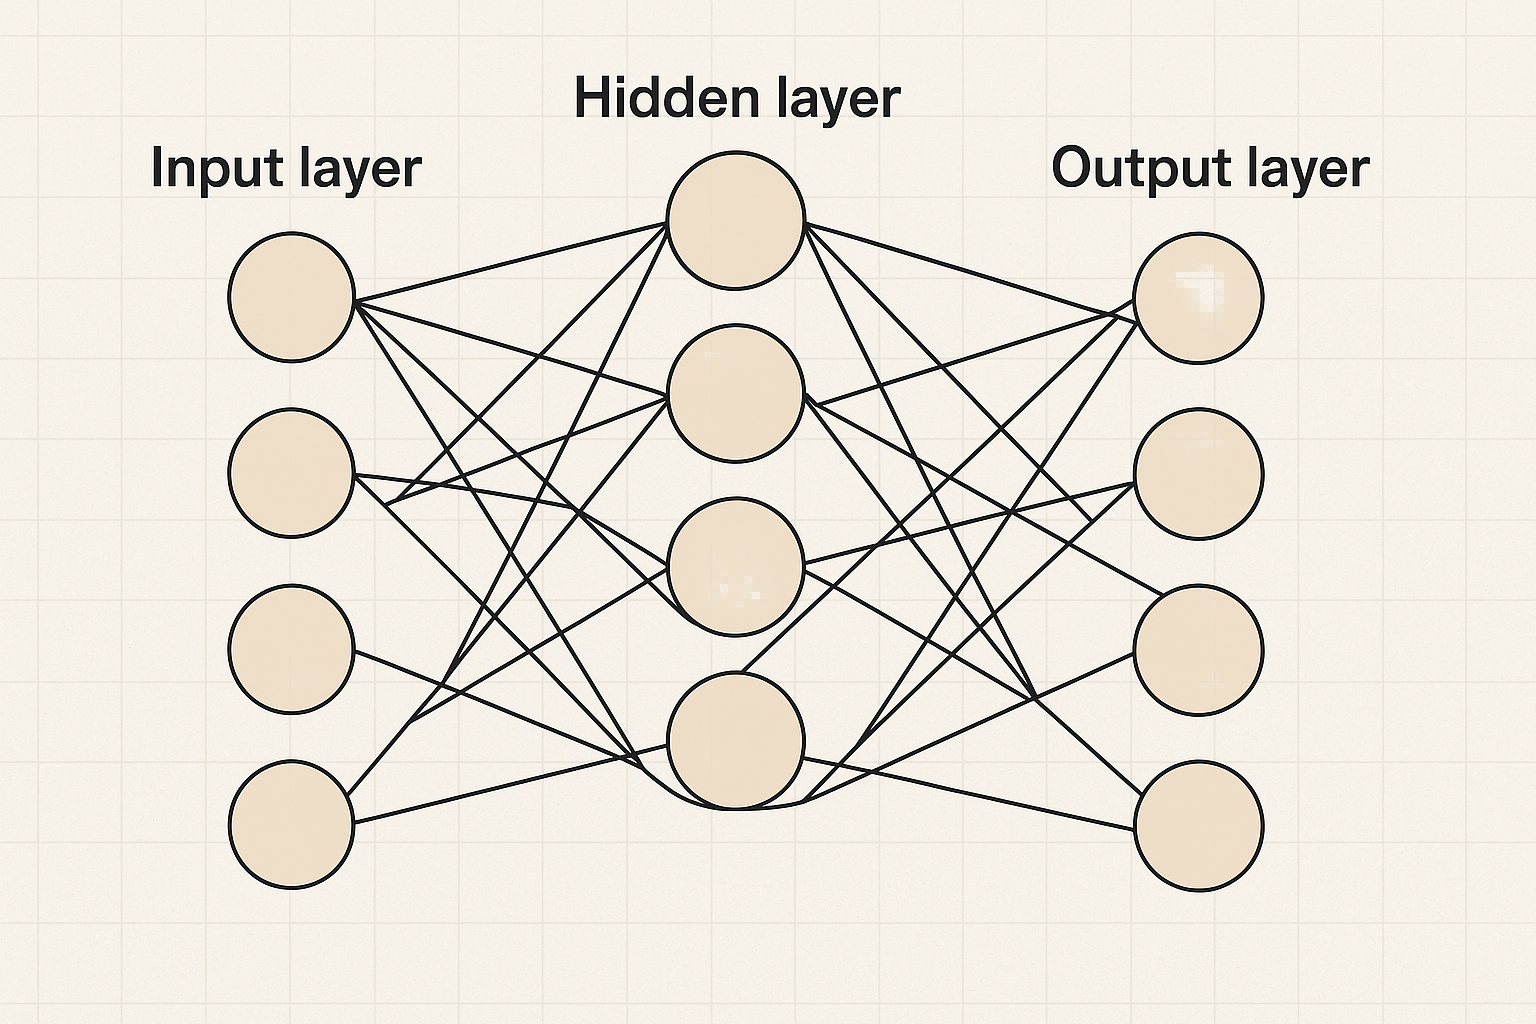       


Notations :     
m : $Card(Training Set)$

n : size of the input vector

$L$ : number of layers or the last layer,  $l$ specific layer.

Since we now khow about activations : $a^l = σ(ω^{l.T}.a^{l-1} + b^l)$

The loss functions are not different from the ones we used before :

MSE for regression: $L(ω , b) = \frac{1}{2m}\sum_{i=1}^m (y^{(i)} - a^{L})^2$

Cross_entropy for classification :  $L(ω , b) = ∑_{i=1}^C ∑_{j=1}^m \mathbf{1}\{y^{(j)}_i=1\}log(\hat{y}^{(j)}_i)$

Recap :  Neuron = linear + activation
         Model = architechture + parameters

---------------------

3) Math prerequisites : Multivariate Calculus

$f$ here is a multivariable function

a) Gradient of $f$ w.r.t a scalar :     
Given a function $f$ from $\mathbb{R^n}$ to $\mathbb{R}$ , we want to derive $f$ with respect to a vector entry x , this partial derivative is the gradient of $f$ wrt x denoted $∇_x (f) = \frac{\partial f(x , y , z ,t ...)}{\partial x}$
It's a scalar.

b) Jacobian of $f$ w.r.t a vector  :

case 1 : if  f is a scalar function from $\mathbb{R^n}$ to $\mathbb{R}$ , the jacobian is the gradient row vector $∇_ω (f) = \frac{\partial f}{\partial \mathbf{w}} =
\begin{bmatrix}
\frac{\partial f}{\partial w_1} & \cdots & \frac{\partial f}{\partial w_n}
\end{bmatrix}$

case2 : if f is vector function from $\mathbb{R^n}$ to $\mathbb{R^m}$ , the jacobian is a (m , n) matrix : $J = \frac{\partial  \mathbf{f}}{\partial \mathbf{w}} =
\begin{bmatrix}
\frac{\partial f_1}{\partial w_1} & \cdots & \frac{\partial f_1}{\partial w_n} \\
\vdots & \ddots & \vdots \\
\frac{\partial f_m}{\partial w_1} & \cdots & \frac{\partial f_m}{\partial w_n}
\end{bmatrix}$

-

c) The Chain rule :   $\frac{\partial y}{\partial x} = \frac{\partial y}{\partial z}*\frac{\partial z}{\partial x}$

d) The jacobian chain rule :  
given $f(ω) = [f_1(g_1(w)).......f_m(g_m(w))] $ and $g = [g_1(w).......g_m(w)] $

$f_i g_i$'s being scalar functions  

then $\frac{\partial \mathbf{f}}{\partial \mathbf{w}} =
\frac{\partial \mathbf{f}}{\partial \mathbf{g}} \cdot
\frac{\partial \mathbf{g}}{\partial \mathbf{w}}
$

if there is no layer function $g_i =1 $

---------------


4) Derivatives of the operations of a neuron :     
1-a) the derivative of an element wise operation :      
an element wise operation

$f(v, w) = F(v) \circ G(w)$

$F(v) =
\begin{bmatrix}
F_1(v) \\
.\\
.\\
.\\
F_n(v)
\end{bmatrix},
\quad
G(w) =
\begin{bmatrix}
G_1(w) \\
.\\
.\\
.\\
G_n(w)
\end{bmatrix}
\quad \Rightarrow \quad
f(v, w) =
\begin{bmatrix}
F_1(v) \cdot G_1(w) \\
.\\
.\\
.\\
F_n(v) \cdot G_n(w)
\end{bmatrix}$


**the jacobian of an element wise operation is always diagonal**

b) the Hadamart product : is the case where the intermediate functions don't do anything ,
 $J = \frac{\partial \mathbf{f}}{\partial \mathbf{v}} = diag(ω) $

c) scalar expansion :     
$F(\vec{v} , x) = f(\vec{v}) \circ g(x)$ where $g(x) = \vec{1}*x$

if $f$ leaves $\vec{v}$ unchanged and g does the same to $x$, then :         

$\frac{\partial f}{\partial \vec{v}}$ = $diag(x)$ and  $∇_x(F) = \vec{v}$

d) Sum function  :        
$Sum(\vec{v})= \sum_{i=1}^n g_i(v)$

$\frac{\partial S}{\partial \vec{v}} = [\frac{\partial g_1}{\partial \vec{v_1}}..........\frac{\partial g_n}{\partial \vec{v_n}}]$

if g leaves v unchanged then $\frac{\partial S}{\partial \vec{v}} = [1......1]$

*************

2- derivative of a neurons activation :      
Let's say we have the following NN architecture

$X= \begin{bmatrix}
x_1 \\.\\.\\.\\x_n\end{bmatrix}$ ----- one Neuron ---- $a = σ(sum(w\circ x)+ b)$

we will use the chain rule so we need some variable changes :      
$
\begin{aligned}
H &= \boldsymbol{w} \circ \boldsymbol{x} \quad &&\text{(element-wise Hadamart product)} \\
S &= \sum s_1 \quad &&\text{(sum of elements)} \\
Z &= s_2 + b \quad &&\text{(the linear part)} \\
\end{aligned}$
THEN :      

$\frac{\partial a}{\partial ω} = \frac{\partial a}{\partial z}*\frac{\partial z}{\partial S}*\frac{\partial S}{\partial H}*\frac{\partial H}{\partial w} $

with our previous results we get :     

$\frac{\partial H}{\partial w} = diag(X)$   

$\frac{\partial S}{\partial H} = \vec{1}$  (1 , n)

$\frac{\partial z}{\partial S} = 1$

$\frac{\partial a}{\partial z} = σ^{'}(z)$

Thus :  $\frac{\partial a}{\partial ω} = σ^{'}(ω^T.X+b)*(1*\vec{1}*diag(X)) = σ^{'}(ω^T.X+b).X^T$

if X where to be Batch of the input , then a would be a vector (m , 1) ,
and with the last result :    

$\frac{\partial \mathbf{a}}{\partial \boldsymbol{\omega}} = \begin{bmatrix}\nabla_{\boldsymbol{\omega}} a_1 \\\vdots \\\nabla_{\boldsymbol{\omega}} a_m\end{bmatrix} = \begin{bmatrix}   σ^{'}(ω^T.X_1+b).X_1^T \\\vdots \\σ^{'}(ω^T.X_m+b).X_m^T\end{bmatrix} = σ^{'}(ω^T.X+b).X^T  $

the dot in the last part is element wise and b is broadcasted for the addition to work.


using the same paradigme with the chain rule , we get $\frac{\partial a}{\partial b} = σ^{'}(ω^T.X+b)*1 $
and the same for X being the hole batch of input.

********
3-derivative of the cost function $C$ :    

$\frac{\partial C}{\partial ω} = \frac{\partial C}{\partial a}*\frac{\partial a}{\partial ω} $
and   $\frac{\partial C}{\partial b} = \frac{\partial C}{\partial a}*\frac{\partial a}{\partial b}$

we are using MSE :      

$\frac{\partial C}{\partial ω} =  -1/m * \sum_{i=1}^m (y^{(i)} - a^{(i)}).(σ^{'}(ω^T.X^{(i)T}+b)).X^{(i)T} = -\sum_{i=1}^m e_i.(σ^{'}(ω^T.X^{(i)T}+b)).X^{(i)T} $

and

$\frac{\partial C}{\partial b} =  -1/m * \sum_{i=1}^m (y^{(i)} - a^{(i)}).(σ^{'}(ω^T.X^{(i)T}+b)) = -\sum_{i=1}^m e_i.(σ^{'}(ω^T.X^{(i)T}+b))$

$e_i$ denoting the error that the model made.

--------------------------------------

4) Gradient descent :     

The - gradient of a function points to the direction of the steepest descent , so using these gradients $ \frac{\partial C}{\partial ω} and \frac{\partial C}{\partial b}$ we have the optimal direction where we should head for ω and b to lower out cost funtion , the norm of our shifting in this direction is set by the learning rate α which we set.

so learning is given by

$ω = ω - α\frac{\partial C}{\partial ω}$

$b = b  - α\frac{\partial C}{\partial b}$

But what we have done , was for a single Neuron in a one layer model , what if we have multiple layers , and many neurons , it seems pretty cumbersome for just one neurone.  
For that we will need 4 equations that the back propagation algorithm uses to calculate these gradients efficiently.

5) 4 equations :     
**Defintion :** the error of a node is $\frac{\partial C}{\partial z_j^l}$

the error of the last layer 3$δ^l_j = \frac{\partial C}{\partial a_j^l}*σ^{'}(z_j^l)$

for a full layer :   $δ^L = \nabla_a C \circ σ^{'}(z^L)$ ----(1)

all layers $\delta^l = \left( (w^{l+1})^T \delta^{l+1} \right) \odot \sigma'(z^l)$

$\delta^l = \frac{\partial C}{\partial b^l} $ (3)

$\frac{\partial C}{\partial w^l} = \delta^l (a^{l-1})^T$ (4)


















In [ ]:
#image classification
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras import datasets , layers , models


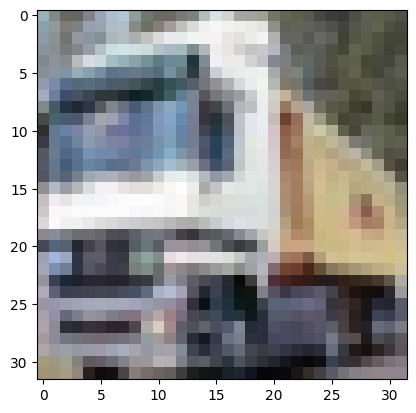

In [ ]:
(xtrain , ytrain)  , (xtest , ytest) = datasets.cifar10.load_data()
image = xtrain[1]
xtrain , xtest = xtrain[:20000]/255 , xtest[:4000]/255
ytrain , ytest = ytrain[:20000] , ytest[:4000]
plt.imshow(image)

In [ ]:
labels =  ['plane' , 'car' , 'bird' , 'cat' , 'deer', 'dog' ,'frog',  'horse' , 'ship' , 'truck']


model = models.Sequential()
model.add(layers.Conv2D(32 , (3, 3) , activation = 'relu' , input_shape = (32 , 32, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64 , (3, 3) , activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64 , (3, 3) , activation = 'relu' , input_shape = (32 , 32, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(64 , activation = 'relu' ))
model.add(layers.Dense(10 , activation = 'softmax' ))

model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ["accuracy"])
model.fit(xtrain , ytrain , epochs = 10 , validation_data = (xtest , ytest))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 45ms/step - accuracy: 0.2427 - loss: 2.0206 - val_accuracy: 0.4358 - val_loss: 1.5493
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 43ms/step - accuracy: 0.4576 - loss: 1.4936 - val_accuracy: 0.5085 - val_loss: 1.3674
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 42ms/step - accuracy: 0.5350 - loss: 1.3112 - val_accuracy: 0.5495 - val_loss: 1.2542
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 42ms/step - accuracy: 0.5751 - loss: 1.1925 - val_accuracy: 0.5725 - val_loss: 1.1938
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.6024 - loss: 1.1170 - val_accuracy: 0.5835 - val_loss: 1.1703
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 42ms/step - accuracy: 0.6298 - loss: 1.0619 - val_accuracy: 0.5753 - val_loss: 1.2280
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 51ms/step - accuracy: 0.6494 - loss: 0.9952 - val_accuracy: 0.6135 - val_loss: 1.1295
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 35s 55ms/step - accuracy: 0.6771 - loss: 0.9327 - 

In [ ]:
accuracy , loss = model.evaluate(xtest , ytest)
model.save("10_images_classifier.model.keras")


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6429 - loss: 1.0563


# Lecture 14 :  Estimation Maximization algorithms

This section will be the introduction to unsupervised learning which is all about finding some form of structure or pattern in unlabelled data, EM is about finding the probability distribution of the data .

Overview:

1.   K-means Clustering
2.   EM algorithm

**1-  K-means clustering :**           
The K-means algorithms clusters our datapoints into K clusters, It's convergence is guaranted.
First we assign K points randomly to be the centroids of our k clusters ,
the cluster assigned to $x^{(i)}$ is $argmin_{C \in clusters} ||x^{(i)}-C||^2$ (The closest eucledian distance).
Each Cluster centroid is then set to the mean of the points belonging to cluster $C$.

**2-EM algoritm**
Motivational example :
+ let's say that you have height data belonging to both female and male subjects and you want to model the average height of females and males , normally we would run MLE to optimize our model parameters and problem would be solved, however you come to find out  that the gender of the subjects was not registered , is there an algorithm that would still allow for missing variables ie: find the best parameters despite having a latent variable.
--------

First , let's start with some Math prerequesits :   

CONVEXITY : let $f$ be a defined function over $I$ ,  $ x, y \in I $ , λ $∈ \mathbb{R}$ , $f$ is convex iff $f(λx + (1-λ)y) <= \lambda f(x) + (1-λ)f(y) $

$f$ is concave iff $f(λx + (1-λ)y) >= \lambda f(x) + (1-λ)f(y) $

JENSEN'S INEQUALITY :   let $f$ be a convex function , and $λ_1,....,λ_n \in \mathbb{R}$ such that $∑_{i=1}^n λ_i = 1 $

then :   $f(∑_{i=1}^n λ_ix_i) <= ∑_{i=1}^n λ_if(x_i)$

we can translate this into  expected value

$f(\mathbf{E[x]}) <= \mathbf{E}[f(x)]$

**Theorem : if f is strictly convex (or concave) , then $\mathbf{E}(f(x))= f(\mathbf{E}(x))$ iff x is a constant**

Latent variables are unobserved variables , we will denote them as $z^{(i)}$ for the instance $i$

$Q_i(z^{(i)})$ is the probability that $x^{(i)}$'s latent variable is equal to $z^{(i)}$

---------
EM can be thought of as MLE for missing or latent variables. It is an algorithm for finding the parameters that will maximize $P(x)$

θ = $argmax_θ log P(X)$=$argmax_θ log P(X;Θ)$=$argmax_θ \sum_{i=1}^m log P(x^{(i)}|z^{(i)};Θ) = $

 $argmax_θ \sum_{i=1}^m  log  \sum_{z^{(i)}} Q_i(z^{(i)})*\frac{P(x^{(i)}|z^{(i)};Θ)}{Q_i(z^{(i)})} =$


$\arg\max_\theta \sum_{i=1}^m \log  \sum_{z^{(i)}} Q_i(z^{(i)}) \cdot P(x^{(i)} \mid z^{(i)} ; \Theta) $
$= \arg\max_\theta \sum_{i=1}^m   log \mathbf{E}(P(x^{(i)} \mid z^{(i)} ; \Theta))  >= $  $arg\max_\theta \sum_{i=1}^m   \mathbf{E} log (P(x^{(i)} \mid z^{(i)} ; \Theta)) $


So we found a funtion that is a lower bound to the likelihood funtion , all is left is to maximize this lower bound to maximize the likelihood , However we dont have $z^{(i)}$'s .

so we fall into a cyclic problem , what we try to do is the following :   we start with a random Θ , we optimize the lower bound with respect to $Q_i(z^{(i)})$  , this gives us $Q_i(z^{(i)})$ , this is called the E step , then we optimize the lower bound with respect to $Θ$  , this gives us $\theta$ , this is the Mstep , and we repeat.

the algorithm converges , but is only guaranted to convege to a local maxima.


# Lecture 15/16/17 :Factor Analysis , PCA , ICA

FACTOR ANALYSIS (the probabilistic method)

Imagine you are an Economics resaercher and you have a relatevely small data set you curated from your sample participants , however you input feature are numerous , say {"sleep hours" , "work hours" , "level of eduaction" , "socio economic status" etc} , and let's say that you want to learn something about this dataset from this information , say for instance , how is one's income affeacted by these features . Undoutely , it is not staightforward how say sleep hours affect one's income , ie: there is not some direct rule or correlation you can extrapolate from this data that can tell you directly how the income is afffected , how it varies if we tweek those input variables can not easily be mapped. It gets even worse if you have a lot of those features.

Is there a technique that can help be grasp the variance in my input features , and boild them down to a few factors that I can easily map to my problem , can this algorithm also show me which feature contributes the most to one of my factors?

This method is called Factor Analysis.

------

.

Principal Component Analysis (the non probabilistic method):    
Say we know our data features are correlated , have  some redundancy in them , or some underlying innner workings for how they cause a certain observation we want to find. Thus we know that our data lives in a feature space with a much lower dimetionality , can we find these new features (called here principal components , since they relate to the principal eigen vectors of the covariance matrix) that are also designed to retain as much information as possible , ie: as much variance as possible.



*   preprocessing

we first make the mean of our data features  to be zero and their variance to be 1 :

$x^{(i)}_j := \frac{x^{(i)}_j - μ_j}{σ_j} $

where : $\mu_j = \frac{1}{m}\sum_{i=1}^m x^{(i)}_j $

and  $\sigma_j = \frac{1}{m}\sum_{i=1}^m (x^{(i)}_j-\mu_j)^2 $


*   optimization problem

As always , we start by formalizing our optimization problem. Turns out there are two equivalent optimization problems for PCA , we will start by the the most intuitive one . Since our goal is to have maximum variance in the data set with the new features , we thus want them to be as spread out as possible in the new feature space , so we want to maximize the sum of the distances of the new points to the origin , which is also exactly the variance of the data.

Using the Pythagorian Theorem, this is also equivalent to minimizing the sum of the distance form the original data point to it's projection in the new feature space.

For a unit vector $u$ , the lenght of the projection of a vector $x^{(i)}$ is given by $u^T⋅x^{(i)}$

Finally :  $u = argmax \sum_{i=1}^m (x^{(i)T}.u)^2 $

$u = argmax \sum_{i=1}^m u^T⋅x^{(i)}⋅x^{(i)T}⋅u$

$u = argmax $ $u^T⋅\sum_{i=1}^m (x^{(i)}⋅x^{(i)T}) ⋅u$

we will set $Σ =\sum_{i=1}^m (x^{(i)}⋅x^{(i)T}) $ which is also the covariance matrix .

*   PCA algorithm

Turns out that the vector $u$ that acheives this is the pricipal eigen vector of the covariance  matrix Σ , which is a symetrical matrix , so it's eigen vectors are orthogonal (or can be chosen to be orthogonal)

Summary : we preprocess our data , compute the covariance matrix, find it's $k$ principal eigen vectors , and project our data onto the new base , given by $y^{(i)} = [u_1^T \cdot x^{(i)}......u_k^T \cdot x^{(i)}]$

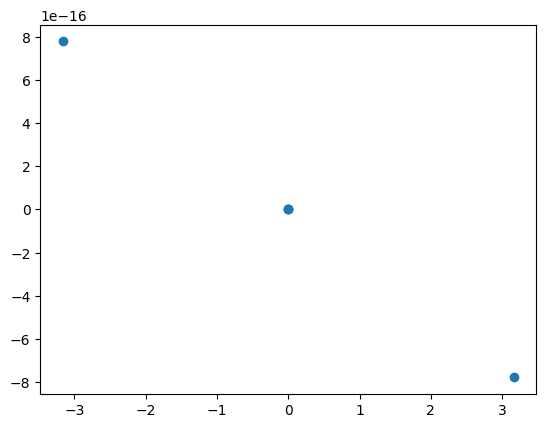

In [ ]:
#lets inplement PCA
import numpy as np
import matplotlib.pyplot as plt

def mean_variance(x):
  #here we assume that the shape of x is (number of examples , num of features)
  x = np.array(x)
  m , n = np.shape(x)
  for j in range(n):
    uj = x[: , j]
    ujsquared = (uj-np.mean(uj))**2
    x[: , j] = x[: , j]- np.mean(uj)
    x[: , j] =  x[: , j]/np.mean(ujsquared)
  return x

def covariance(x):
  sigma = np.dot(x.T, x)
  return sigma

def pca2(x):
  x = mean_variance(x)
  sigma = covariance(x)
  eigvals , eigvecs = np.linalg.eigh(sigma)
  idx = np.argsort(eigvals)[:: -1]
  eigvals = eigvals[idx]
  eigvecs = eigvecs[: , idx]
  u1 , u2 = eigvecs[: , 0] , eigvecs[: , 1]

  return np.dot(x , u1) , np.dot(x , u2)
X = np.array([
    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
    [2, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
    [4, 2, 6, 7, 8, 9, 10, 11, 12, 13, 14],
    [5, 3, 7, 8, 9, 10, 11, 12, 13, 14, 15],
])
x, y = pca2(X)
plt.scatter(x , y)

ICA : independent conponent analysis
ICA assumes that your observed data $X$ is a linear transformation of matrix $A$ called the mixing matrix  of a set of independent sources , for instance the cocktail party problem where we get to observe recordings of different microphones of a bunch of people talking (sources) , the goal of ICA is to seperate out the mixing of voices and give the recording of each voice  .
Unlike PCA whose goal was to maximize the variance of the data , ICA maximizes the independence of the sources .

Statistically speaking ,the  independence of two variables $x$ and $y$ is given by $P((x, y))= p(x)*p(y)$.

Assumptions : ICA only works if our data $X$ is non gaussian , also we assume that the sources are independent.

As usual , we will try to model the density of $P_{s}(S)$ in order to do MLE .



1.   First , let's introduce $F=CFD$ (cummulative distribution function)
  $F(x) = P(X<=x)$ , and so  $P(x) = F^{'}(x)$.
2.   The ICA algorithm :       
our model $X = A⋅S = W^{-1}⋅S$ , thus $S=W⋅X$

$P_x(X) = P_s(W⋅X).|W|$

we can now choose a $F(s)$ that integrates to zero like the sigmoid function.

MLE : $P_{x}(X) = ∏_{j=1}^n P_s(W_j^T⋅X).|W|$

$l(W) = \sum_{i=1}^n log(∏_{j=1}^n P_s(W_j^T⋅X^{(i)}).|W|)$

we can then use stochastic GD.




